<a href="https://colab.research.google.com/github/RITABRITA-0407/Logistic-regression/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Logistic Regression on Titanic Dataset
Goal: Predict passenger survival using logistic regression.


In [ ]:
pip install pandas seaborn scikit-learn matplotlib

Step 2: Load and Explore the Dataset

In [ ]:
# Import essential libraries
import pandas as pd # Data handling
import seaborn as sns # Built-in Titanic dataset and plots
import matplotlib.pyplot as plt # Plotting
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LogisticRegression # Our model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [ ]:
# Display the first few rows
print(df.head())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


Step 3: Preprocess the Data

In [ ]:
# Drop irrelevant or high-missing columns
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Encode categorical variables: sex, embarked
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
# Verify the dataset is clean
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    int64  
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 50.8 KB
None


Step 4: Define Features and Target


In [ ]:
# Choose input features
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]  # Features

In [ ]:
# Define target variable
y = df['survived']  # 1 = survived, 0 = died

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Step 5: Train the Logistic Regression Model

In [ ]:
# Create the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence

In [ ]:
# Fit the model
model.fit(X_train, y_train)
# Output the learned coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[-1.31712588e+00  2.56188423e+00 -3.76087119e-02 -3.34326183e-01
   4.90515737e-03 -3.47345448e-04  7.10325001e-02]]
Model Intercept: [2.69599008]


Step 6: Evaluate the Model

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7972027972027972


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



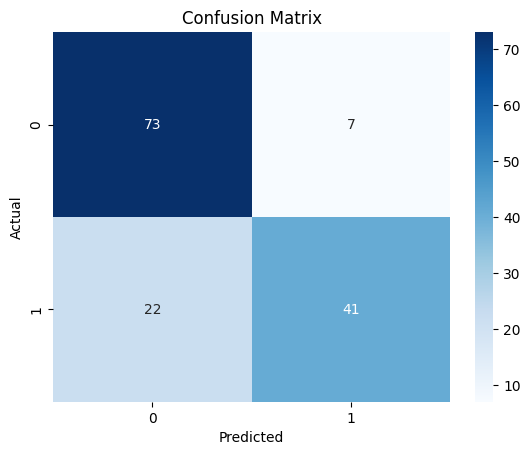

In [ ]:
# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()